In [1]:
# 불필요한 경고 출력을 방지
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
from sklearn.datasets import load_iris

In [3]:
# iris 데이터셋 로드
iris = load_iris()

In [4]:
data = iris['data']
data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [5]:
feature_names = iris['feature_names']
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

* **sepal**: 꽃 받침
* **petal**: 꽃잎

In [6]:
target = iris['target']
target[:5]

array([0, 0, 0, 0, 0])

In [7]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### 데이터프레임 만들기

In [8]:
df_iris = pd.DataFrame(data, columns=feature_names)

In [9]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
df_iris['target'] = target

In [11]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 시각화

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

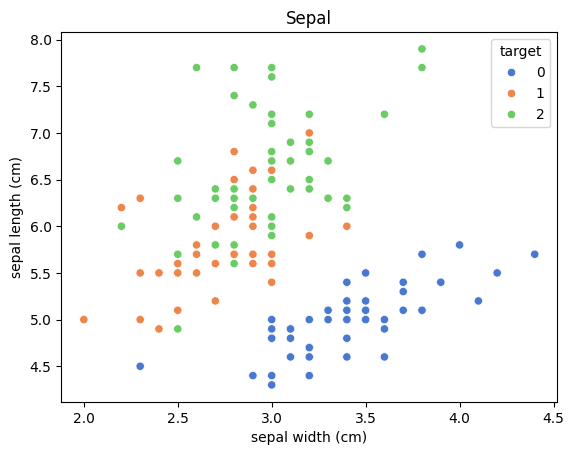

In [13]:
#sns.scatterplot(data=df_iris, x='sepal width (cm)', y='sepal length (cm)', hue='target')
#sns.scatterplot(data=df_iris, x='sepal width (cm)', y='sepal length (cm)', hue='target', palette='brg')
sns.scatterplot(data=df_iris, x='sepal width (cm)', y='sepal length (cm)', hue='target', palette='muted')
plt.title('Sepal')
plt.show()
#'petal length (cm)', 'petal width (cm)',

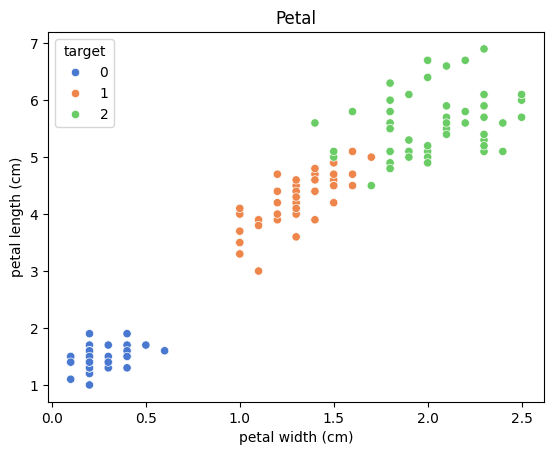

In [14]:
sns.scatterplot(data=df_iris, x='petal width (cm)', y='petal length (cm)', hue='target', palette='muted')
plt.title('Petal')
plt.show()

### 데이터 불균형 확인 

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = df_iris.drop('target', axis=1)

In [17]:
y = df_iris['target']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.25, 
    random_state=10, 
    stratify=y
)

In [19]:
X_train.shape, y_train.shape

((112, 4), (112,))

In [20]:
X_test.shape, y_test.shape

((38, 4), (38,))

# 지도학습 알고리즘 이해 및 실습

## LogisticRegression 분류모델 학습

### step1 학습기 선언

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
model_lr = LogisticRegression()

### step2 모델 학습

In [23]:
model_lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### step3 학습모델 테스트(예측수행)

In [24]:
pred_lr = model_lr.predict(X_test)

In [25]:
pred_lr[:5]

array([1, 1, 2, 2, 2])

### step4 학습모델 평가

In [26]:
from sklearn.metrics import accuracy_score, classification_report
print("정확도 : ", accuracy_score(y_test, pred_lr))
print(classification_report(y_test, pred_lr))

정확도 :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [27]:
from sklearn.metrics import roc_auc_score
# 다중 클래스 문제에서 ROC AUC 점수 계산
# pred_lr 대신 예측 확률을 사용해야 함.
pred_proba_lr = model_lr.predict_proba(X_test)
print(roc_auc_score(y_test, pred_proba_lr, multi_class='ovr'))

1.0


### step5 학습모델 저장

In [28]:
# 폴더 만들기
import os
dir_name = "models"
os.makedirs(dir_name, exist_ok=True)

In [29]:
# 모델 생성
import pickle
with open(f'{dir_name}/iris_model_lr.pkl', 'wb') as f:
    #pickle.dump(ML모델명, 파일식별자)
    pickle.dump(model_lr, f)

## 랜덤 포레스트 모델 학습

### step1 학습기 선언

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
model_rfc = RandomForestClassifier()
model_rfc

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### step2 모델 학습

In [32]:
model_rfc.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### step3 학습모델 테스트(예측수행)

In [33]:
pred_rfc = model_rfc.predict(X_test)

In [34]:
pred_rfc

array([1, 1, 2, 2, 2, 1, 0, 2, 2, 0, 1, 1, 1, 1, 0, 2, 0, 1, 0, 0, 2, 2,
       0, 1, 2, 0, 2, 2, 1, 2, 0, 0, 0, 1, 1, 1, 0, 2])

### step4 학습모델 평가

In [35]:
from sklearn.metrics import accuracy_score, classification_report
print("정확도 : ", accuracy_score(y_test, pred_rfc))
print(classification_report(y_test, pred_rfc))

정확도 :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [36]:
from sklearn.metrics import roc_auc_score
# 다중 클래스 문제에서 ROC AUC 점수 계산
# pred_rfc 대신 예측 확률을 사용해야 함.
pred_proba_rfc = model_rfc.predict_proba(X_test)
print(roc_auc_score(y_test, pred_proba_rfc, multi_class='ovr'))

1.0


### step5 학습모델 저장

In [37]:
# 폴더 만들기
import os
dir_name = "models"
os.makedirs(dir_name, exist_ok=True)

In [38]:
# 모델 저장 방법1
with open(f'{dir_name}/iris_model_rfc.pkl', 'wb') as f:
    #pickle.dump(ML모델명, 파일식별자)
    pickle.dump(model_rfc, f)

In [39]:
# 모델 저장 방법2
import joblib

joblib.dump(model_rfc, f'{dir_name}/iris_model_rfc.joblib')

['models/iris_model_rfc.joblib']